In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import numpy as np
print(sys.version)


3.9.4 (default, Jan 24 2022, 11:24:14) 
[Clang 13.0.0 (clang-1300.0.29.30)]


# Read data from CSV

`pd.read_csv`: takes in a csv and returns a pandas dataframe.

`train_test_split`: splits arrays or matrices into random train and tests sets.
- `train_size`: 0-1 value representing the percent of the dataset in the training set.
- `test_size`: see above, but for test set.
- `random_state`: state used for shuffling. To replicate results, use same `random_state`.

In [2]:
# Read data from train csv
data = pd.read_csv('../datasets/kaggle-house-prices/train.csv', index_col="Id")
X_test_full = pd.read_csv('../datasets/kaggle-house-prices/test.csv', index_col="Id")

# Drop rows with missing label
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
data.dropna(axis=1, inplace=True)
data.head()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [3]:
# Separate label from features
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1)

# Run train_test_split to split data 80% train 20% validation
X_train_full, X_valid_full, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0)

In [4]:
X_train_full.describe()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.605308,10589.672945,6.086473,5.572774,1970.890411,1984.692637,439.890411,45.571918,568.049658,1053.511986,...,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349
std,42.172322,10704.180793,1.367472,1.116908,30.407486,20.684612,435.106803,156.229962,437.569919,412.073393,...,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,228.000000,798.750000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,379.500000,0.000000,482.500000,992.000000,...,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,716.000000,0.000000,811.250000,1276.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2260.000000,1120.000000,2153.000000,3206.000000,...,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [5]:
X_train_full.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,...,0,44,0,0,0,0,8,2009,WD,Normal
818,20,RL,13265,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,59,0,0,0,0,0,7,2008,WD,Normal
303,20,RL,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,...,81,0,0,0,0,0,1,2006,WD,Normal


In [6]:
X_train_full.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

# Data Preprocessing

In [7]:
# Low cardinality columns
# Returns a list of categorical columns with low cardinality
    # Unique values < 10
low_cardinality_cols = [colName for colName in X_train_full.columns 
                        if X_train_full[colName].nunique() < 10 and 
                            X_train_full[colName].dtype == "object"]

# Numeric columns
# Returns a list of numeric columns
numeric_cols = [colName for colName in X_train_full.columns
                if X_train_full[colName].dtype in ['int64', 'float64']]

# Copy only selected columns (low cardinality and numeric)
selected_cols = numeric_cols #+ low_cardinality_cols
X_train = X_train_full[selected_cols].copy()
X_valid = X_valid_full[selected_cols].copy()
X_test = X_test_full[selected_cols].copy()

X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,11694,9,5,2007,2007,48,0,1774,1822,...,774,0,108,0,0,260,0,0,7,2007
871,20,6600,5,5,1962,1962,0,0,894,894,...,308,0,0,0,0,0,0,0,8,2009
93,30,13360,5,7,1921,2006,713,0,163,876,...,432,0,0,44,0,0,0,0,8,2009
818,20,13265,8,5,2002,2002,1218,0,350,1568,...,857,150,59,0,0,0,0,0,7,2008
303,20,13704,7,5,2001,2002,0,0,1541,1541,...,843,468,81,0,0,0,0,0,1,2006


In [8]:
# One-Hot Encoding
X_train_OH = pd.get_dummies(X_train)
X_valid_OH = pd.get_dummies(X_valid)
X_test_OH = pd.get_dummies(X_test)

# Perform left join only on columns (axis=1)
X_train_OH, X_valid_OH = X_train_OH.align(X_valid_OH, join='left', axis=1)
X_train_OH, X_test_OH = X_train_OH.align(X_test_OH, join='left', axis=1)

X_train_OH.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,11694,9,5,2007,2007,48,0,1774,1822,...,774,0,108,0,0,260,0,0,7,2007
871,20,6600,5,5,1962,1962,0,0,894,894,...,308,0,0,0,0,0,0,0,8,2009
93,30,13360,5,7,1921,2006,713,0,163,876,...,432,0,0,44,0,0,0,0,8,2009
818,20,13265,8,5,2002,2002,1218,0,350,1568,...,857,150,59,0,0,0,0,0,7,2008
303,20,13704,7,5,2001,2002,0,0,1541,1541,...,843,468,81,0,0,0,0,0,1,2006


(array([372.,   0.,   0., 542.,   0.,   0., 140.,   0.,   0.,  67.,   0.,
          0.,   1.,   0.,   0.,  17.,   0.,   0.,   4.,   0.,   0.,  10.,
          0.,   0.,   3.,   0.,   0.,   3.,   0.,   0.,   2.,   0.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.]),
 array([ 0.        ,  0.32653061,  0.65306122,  0.97959184,  1.30612245,
         1.63265306,  1.95918367,  2.28571429,  2.6122449 ,  2.93877551,
         3.26530612,  3.59183673,  3.91836735,  4.24489796,  4.57142857,
         4.89795918,  5.2244898 ,  5.55102041,  5.87755102,  6.20408163,
         6.53061224,  6.85714286,  7.18367347,  7.51020408,  7.83673469,
         8.16326531,  8.48979592,  8.81632653,  9.14285714,  9.46938776,
         9.79591837, 10.12244898, 10.44897959, 10.7755102 , 11.10204082,
        11.42857143, 11.75510204, 12.08163265, 12.40816327, 12.73469388,
        13.06122449, 13.3877551 , 13.71428571, 14.04081633, 14.36734694,
       

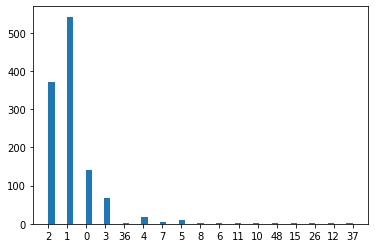

In [9]:
# Binning
min_lotArea = X_train.LotArea.min()
max_lotArea = X_train.LotArea.max()
num_bins = 50
bins = np.linspace(min_lotArea, max_lotArea, num_bins)
labels = [str(i) for i in range(num_bins-1)]

lotArea_binned = pd.cut(X_train.LotArea, bins=bins, labels=labels, include_lowest=True)

In [10]:
# Normalization

# Standardization

# Missing Features


In [11]:
# Data Imputation
imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.fit_transform(X_valid))